In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid") # set the style of the plots
df = pd.read_csv('./drive/MyDrive/Capstone/Codes/final_result_df_719.csv')

Mounted at /content/drive


In [ ]:
df['Total Work Years'] = df['Total Work Years'].apply(lambda x: 0 if x < 0 else x)
df.describe(include='all')

,FounderID,CompanyID,CareerID,Number of professional experience,Number of companies that worked for,Total Work Years,Industry Experience,Management experience,Entrepreneurial Experience,Technical experience,Location,Vertical,Speed_avg,relevance,Founded Company Value,binary success,Level of success
count,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801,1738,1548.000000,1801.000000,1.801000e+03,1801,1801
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,41,NaN,NaN,NaN,2,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,HRtech,NaN,NaN,NaN,Not successful,Not successful
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,792,129,NaN,NaN,NaN,1749,791
mean,11136.825097,68260.633537,181264.612993,5.183787,4.574681,13.059467,0.298223,5.742976,3.817823,2.648195,NaN,NaN,1.007918,0.042199,1.427706e+08,NaN,NaN
std,7759.447346,49083.258974,105270.852013,4.302077,3.956444,14.422025,1.584430,9.582195,8.437595,5.085657,NaN,NaN,1.635308,0.201098,1.116902e+09,NaN,NaN
min,1.000000,105.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.111111,0.000000,8.475000e+03,NaN,NaN
25%,4957.000000,27309.000000,72196.000000,2.000000,2.000000,4.100000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.256410,0.000000,3.623425e+06,NaN,NaN
50%,10415.000000,52081.000000,198923.000000,5.000000,4.000000,9.100000,0.000000,1.900000,0.000000,0.000000,NaN,NaN,0.516095,0.000000,1.454812e+07,NaN,NaN
75%,15491.000000,120766.000000,272807.000000,7.000000,6.000000,17.100000,0.000000,7.500000,4.300000,3.300000,NaN,NaN,1.111111,0.000000,5.500000e+07,NaN,NaN


### Number of professional experience and companies that worked for, Total Work Years

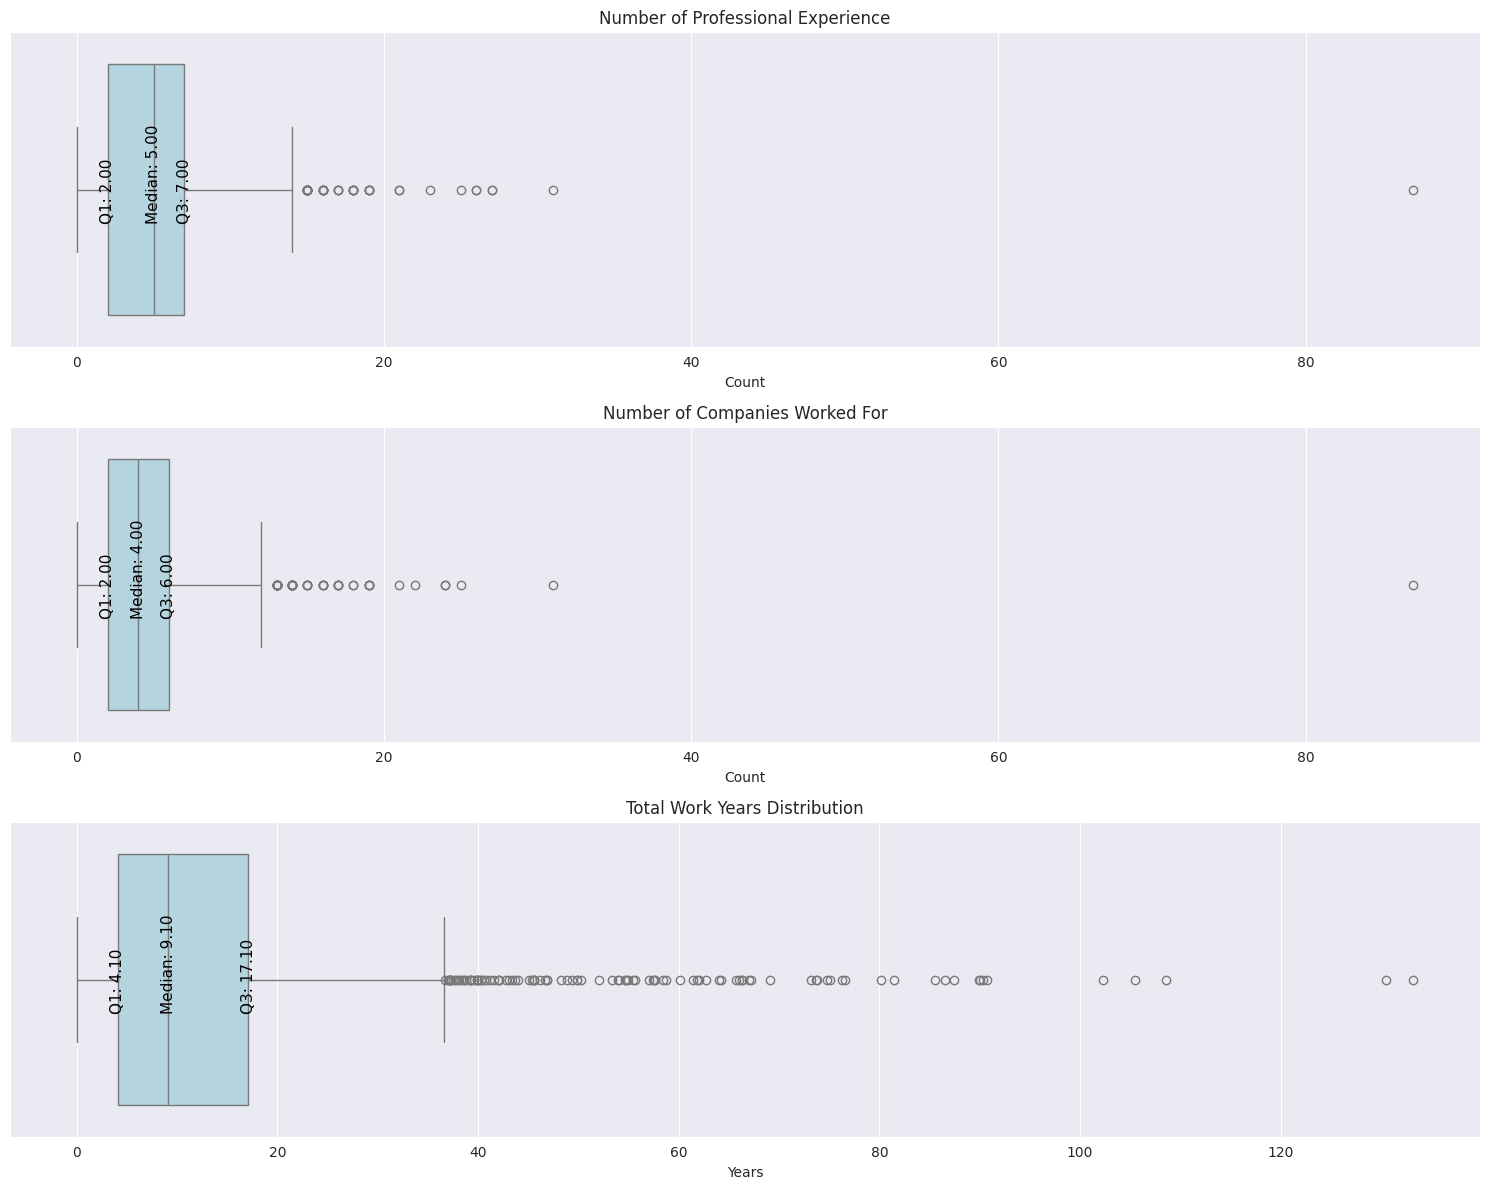

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=False)

# Plot for 'Number of professional experience'
sns.boxplot(x=df['Number of professional experience'], ax=axes[0], color='lightblue')
axes[0].set_title('Number of Professional Experience')
axes[0].set_xlabel('Count')
q1 = df['Number of professional experience'].quantile(0.25)
median = df['Number of professional experience'].median()
q3 = df['Number of professional experience'].quantile(0.75)
axes[0].text(median, 0.1, f'Median: {median:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)
axes[0].text(q1, 0.1, f'Q1: {q1:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)
axes[0].text(q3, 0.1, f'Q3: {q3:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)

# Plot for 'Number of companies that worked for'
sns.boxplot(x=df['Number of companies that worked for'], ax=axes[1], color='lightblue')
axes[1].set_title('Number of Companies Worked For')
axes[1].set_xlabel('Count')
q1 = df['Number of companies that worked for'].quantile(0.25)
median = df['Number of companies that worked for'].median()
q3 = df['Number of companies that worked for'].quantile(0.75)
axes[1].text(median, 0.1, f'Median: {median:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)
axes[1].text(q1, 0.1, f'Q1: {q1:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)
axes[1].text(q3, 0.1, f'Q3: {q3:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)

# Plot for 'Total Work Years'
sns.boxplot(x=df['Total Work Years'], ax=axes[2], color='lightblue')
axes[2].set_title('Total Work Years Distribution')
axes[2].set_xlabel('Years')
q1 = df['Total Work Years'].quantile(0.25)
median = df['Total Work Years'].median()
q3 = df['Total Work Years'].quantile(0.75)
axes[2].text(median, 0.1, f'Median: {median:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)
axes[2].text(q1, 0.1, f'Q1: {q1:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)
axes[2].text(q3, 0.1, f'Q3: {q3:.2f}', horizontalalignment='center', rotation=90, color='k', fontsize=11)

plt.tight_layout()
plt.show()

### Vertical & Location

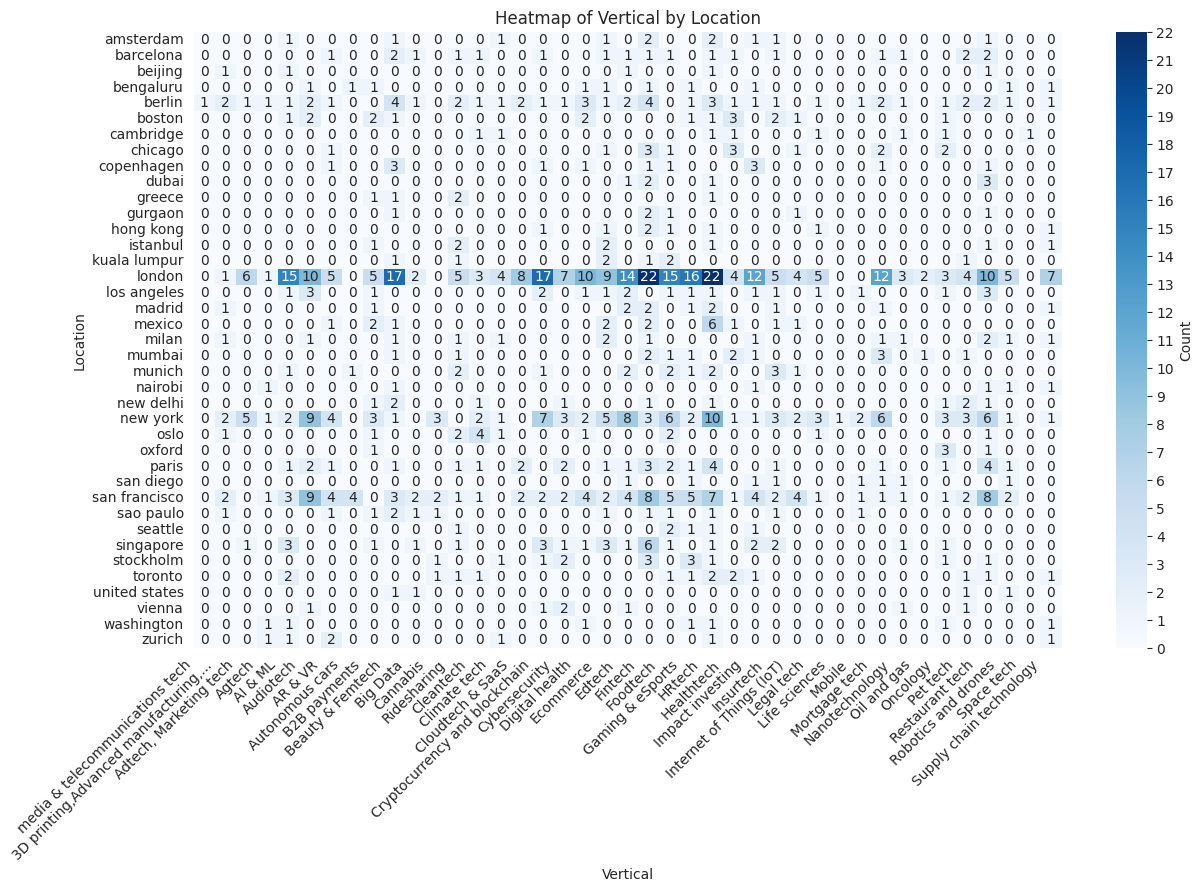

In [ ]:
# Vertical & Location
filtered_df = df[df['Location'] != 'other']

cross_tab = pd.crosstab(filtered_df['Location'], filtered_df['Vertical'])

plt.figure(figsize=(14, 8))

ax = sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d', cbar_kws={'ticks': range(0, cross_tab.values.max()+1)})

colorbar = ax.collections[0].colorbar
colorbar.set_label('Count')
colorbar.set_ticks(range(0, cross_tab.values.max()+1))

new_labels =  ['media & telecommunications tech', '3D printing,Advanced manufacturing,...', 'Adtech, Marketing tech', 'Agtech', 'AI & ML', 'Audiotech',
               'AR & VR', 'Autonomous cars', 'B2B payments', 'Beauty & Femtech', 'Big Data', 'Cannabis', 'Ridesharing', 'Cleantech',
               'Climate tech', 'Cloudtech & SaaS', 'Cryptocurrency and blockchain', 'Cybersecurity', 'Digital health', 'Ecommerce',
               'Edtech', 'Fintech', 'Foodtech', 'Gaming & eSports', 'HRtech', 'Healthtech', 'Impact investing', 'Insurtech', 'Internet of Things (IoT)',
               'Legal tech', 'Life sciences', 'Mobile', 'Mortgage tech', 'Nanotechnology', 'Oil and gas', 'Oncology', 'Pet tech', 'Restaurant tech',
               'Robotics and drones', 'Space tech', 'Supply chain technology']

plt.xlabel('Vertical')
plt.ylabel('Location')
plt.title('Heatmap of Vertical by Location')
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45, ha='right')
plt.show()

In [ ]:

levels_order = ['Not successful', 'Promising', 'Successful', 'Moderately Successful', 'Highly successful']

summary_data = []


for level in levels_order:
    subset = df[df['Level of success'] == level]


    subset = subset[subset['Speed_avg'] >= 0]


    mean_val = np.mean(subset['Speed_avg'])
    q1_val = np.percentile(subset['Speed_avg'], 25)
    median_val = np.median(subset['Speed_avg'])
    q3_val = np.percentile(subset['Speed_avg'], 75)
    iqr_val = q3_val - q1_val
    lower_bound = q1_val - 1.5 * iqr_val
    upper_bound = q3_val + 1.5 * iqr_val


    outliers = subset[(subset['Speed_avg'] < lower_bound) | (subset['Speed_avg'] > upper_bound)]


    std_val = np.std(subset['Speed_avg'])
    min_val = np.min(subset['Speed_avg'])
    max_val = np.max(subset['Speed_avg'])
    count_val = subset['Speed_avg'].count()



    summary_data.append([level, count_val, mean_val, std_val,  min_val, lower_bound, q1_val, median_val, q3_val, upper_bound, max_val, len(outliers)])


summary_df = pd.DataFrame(summary_data, columns=['Level of Success', 'Count', 'Mean', 'sd', 'Min', 'lower_bound', 'Q1', 'Median', 'Q3', 'upper_bound', 'Max', 'Number of Outliers'])

summary_df

,Level of Success,Count,Mean,sd,Min,lower_bound,Q1,Median,Q3,upper_bound,Max,Number of Outliers
0,Not successful,665,1.013327,1.598302,0.0,-1.014493,0.260870,0.523810,1.111111,2.386473,20.000000,67
1,Promising,469,1.069294,1.773285,0.0,-1.047619,0.266667,0.523810,1.142857,2.457143,20.000000,47
2,Successful,224,0.920126,1.366113,0.0,-0.961033,0.240806,0.462703,1.042032,2.243871,13.333333,21
3,Moderately Successful,140,1.052800,1.908379,0.0,-1.017764,0.276476,0.566003,1.139302,2.433541,20.000000,14
4,Highly successful,49,0.642990,0.699515,0.0,-0.808637,0.156545,0.375000,0.800000,1.765182,3.076923,3


### Speed of Growth & Level of Success

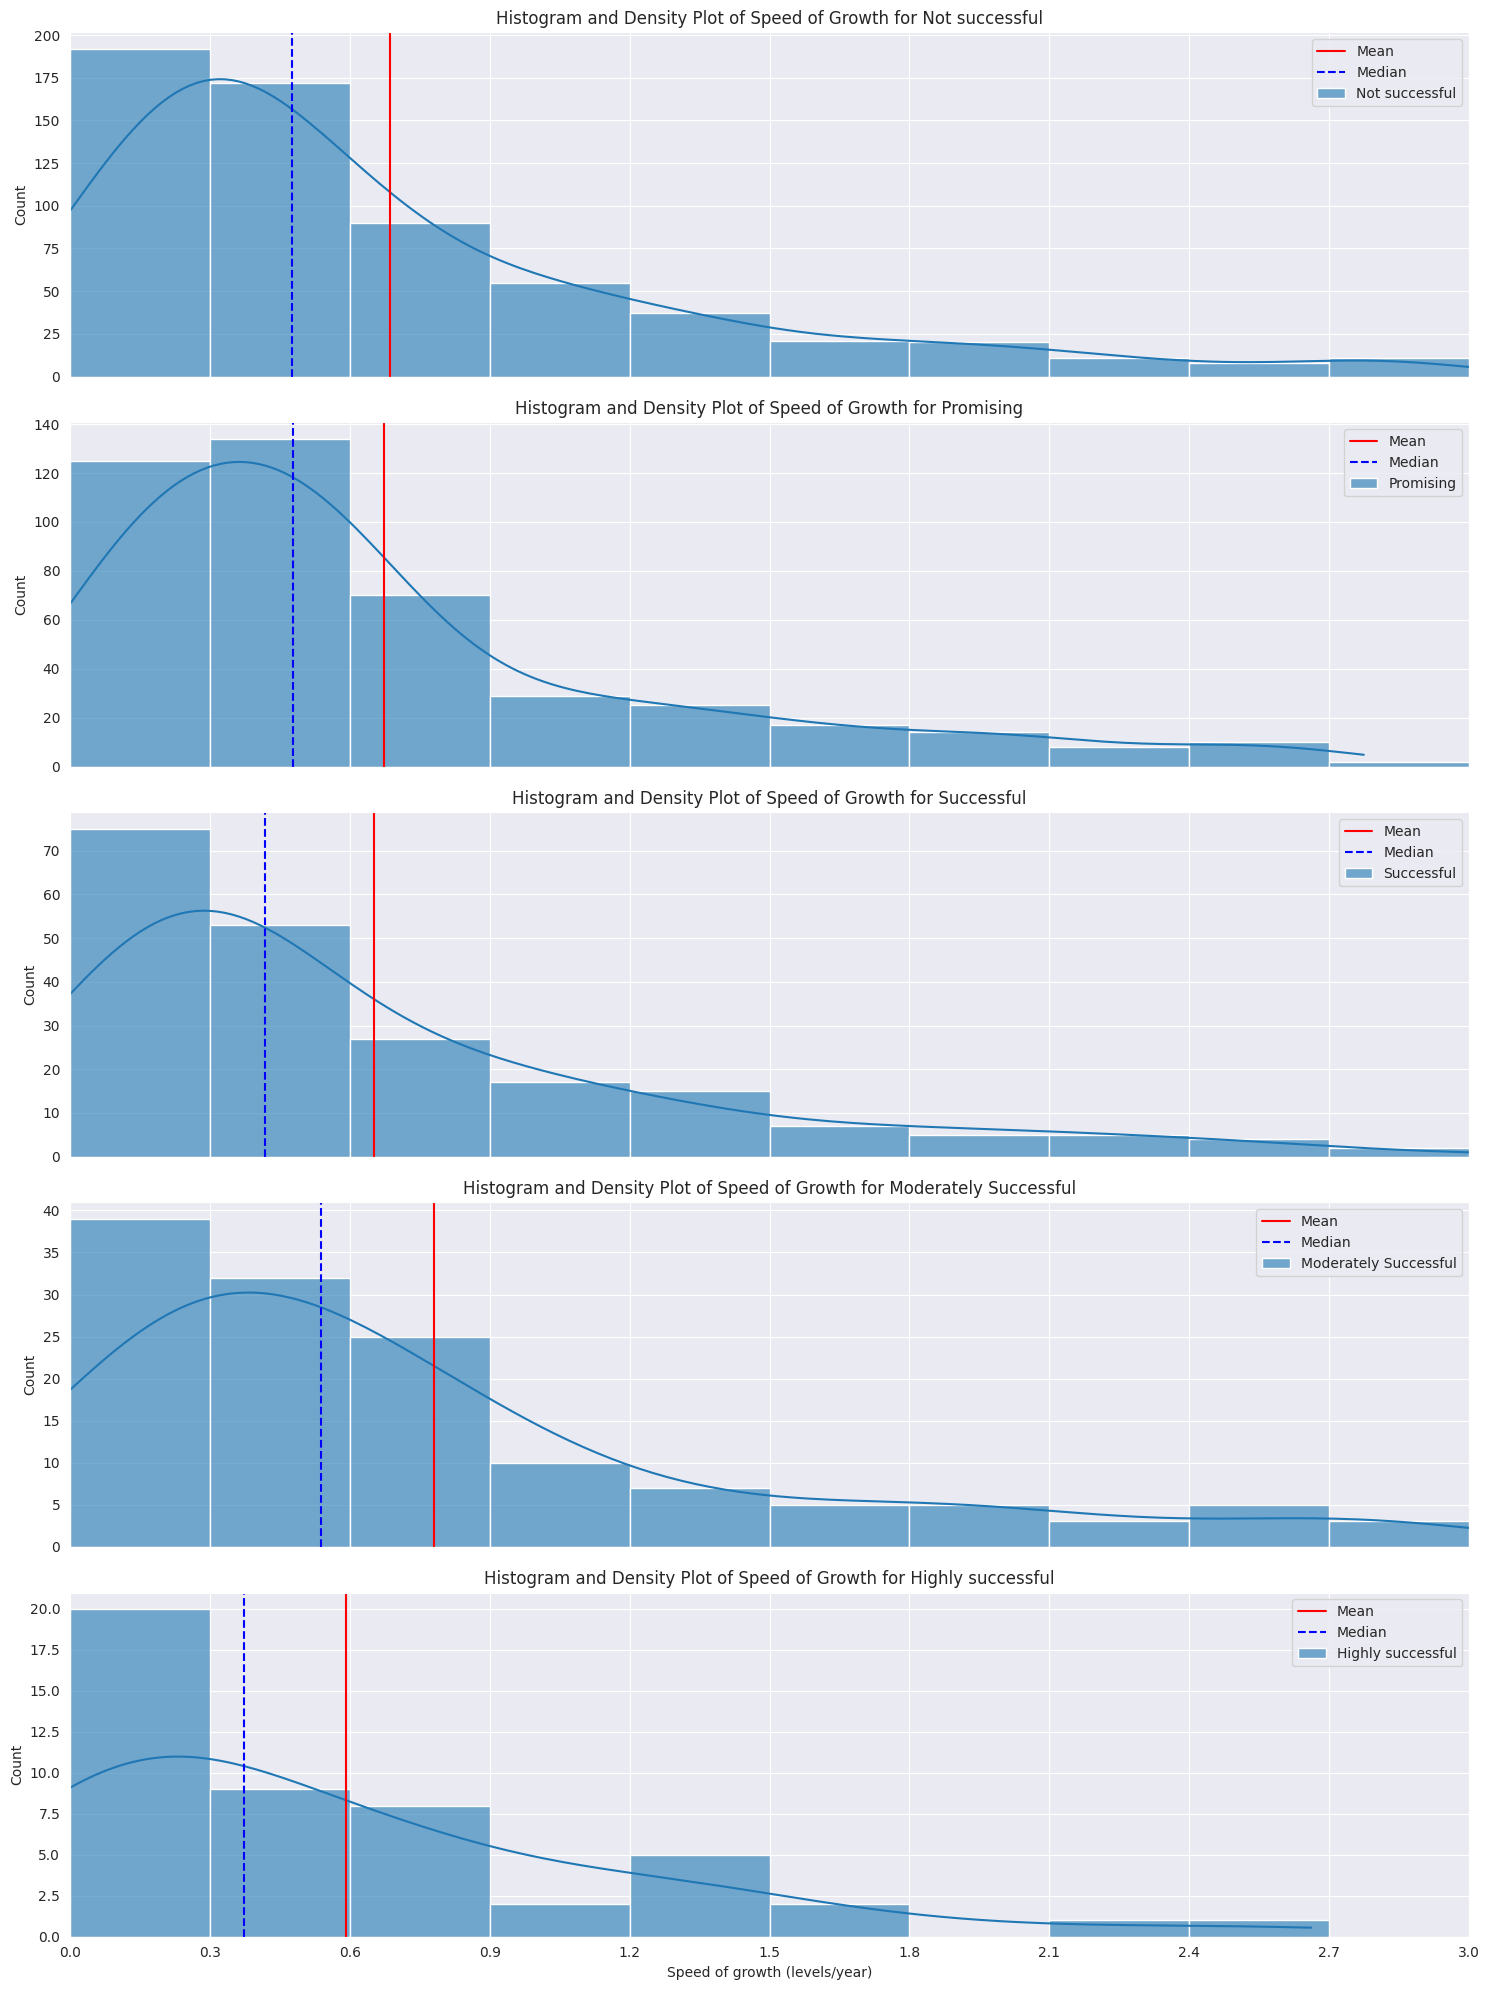

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), sharex=True)

levels_order = ['Not successful', 'Promising', 'Successful', 'Moderately Successful', 'Highly successful']

for i, level in enumerate(levels_order):
    subset = df[df['Level of success'] == level]

    subset = subset[(subset['Speed_avg'] >= 0) & (subset['Speed_avg'] <= 3)]
    sns.histplot(subset['Speed_avg'], bins=np.arange(0, 3.3, 0.3), kde=True, ax=axes[i], label=level, alpha=0.6)

    mean_val = np.mean(subset['Speed_avg'])
    axes[i].axvline(mean_val, color='r', linestyle='-', label='Mean')
    median_val = np.median(subset['Speed_avg'])
    axes[i].axvline(median_val, color='b', linestyle='--', label='Median')

    axes[i].set_title(f'Histogram and Density Plot of Speed of Growth for {level}')
    axes[i].set_xlabel('Speed_avg')
    axes[i].set_ylabel('Count')
    axes[i].legend()
    axes[i].set_xlim(0, 3)
    axes[i].set_xticks(np.arange(0, 3.1, 0.3))

axes[-1].set_xlabel('Speed of growth (levels/year)')

plt.tight_layout()
plt.show()

### Various Experiences

In [ ]:
# Experience
df['Management Experience'] = df['Management experience']
df['Technical Experience'] = df['Technical experience']
df_binary = df.copy()
for col in ['Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience']:
    df_binary[col] = df_binary[col].apply(lambda x: 1 if x > 0 else 0)

df_binary[['Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience', 'binary success']]

,Industry Experience,Management experience,Entrepreneurial Experience,Technical experience,binary success
0,0,1,0,1,Not successful
1,0,1,1,0,Not successful
2,0,1,0,1,Not successful
3,0,0,0,1,Not successful
4,0,1,0,0,Not successful
...,...,...,...,...,...
1796,1,1,1,0,Not successful
1797,0,1,0,0,Not successful
1798,0,1,1,0,Not successful
1799,0,1,1,1,Not successful


<ipython-input-10-57c1fbbb7361>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_successful_given_no_experience = no_experience_probs[1]
<ipython-input-10-57c1fbbb7361>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_successful_given_experience = experience_probs[1]
<ipython-input-10-57c1fbbb7361>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_successful_given_no_experience = no_experience_probs[1]
<ipython-input-10-57c1

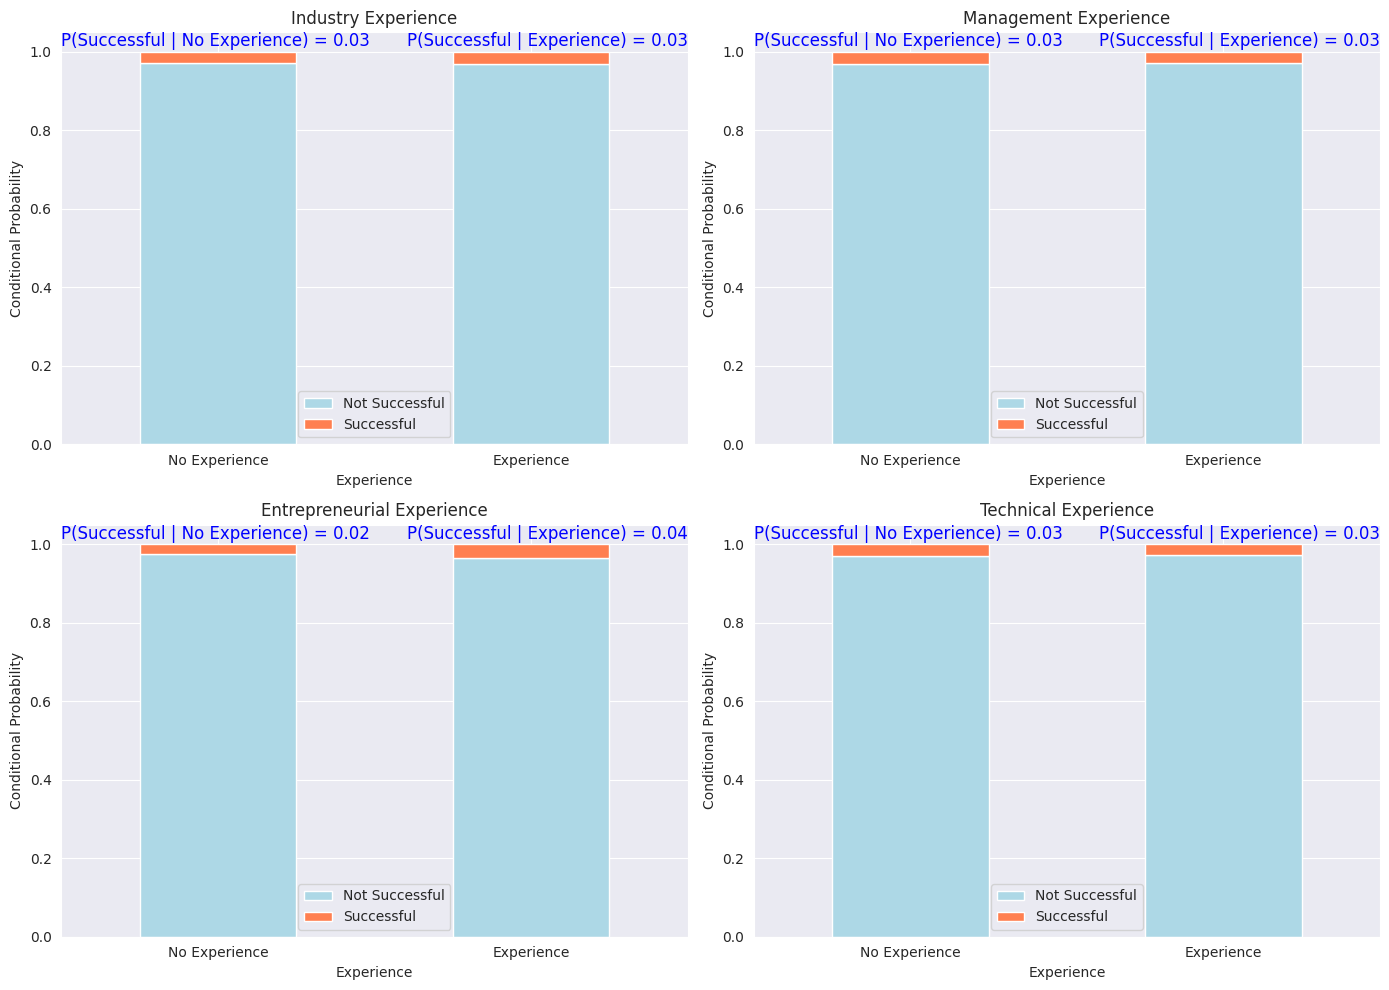

In [ ]:
experience_columns = ['Industry Experience', 'Management experience', 'Entrepreneurial Experience', 'Technical experience']
experience_labels = ['Industry Experience', 'Management Experience', 'Entrepreneurial Experience', 'Technical Experience']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, col in enumerate(experience_columns):
    experience_success_counts = df_binary.groupby([col, 'binary success']).size().unstack(fill_value=0)


    no_experience_probs = experience_success_counts.loc[0] / experience_success_counts.loc[0].sum()
    experience_probs = experience_success_counts.loc[1] / experience_success_counts.loc[1].sum()


    plot_data = pd.DataFrame({
        'No Experience': no_experience_probs,
        'Experience': experience_probs
    }).T


    row = i // 2
    col = i % 2
    ax = plot_data.plot(kind='bar', stacked=True, color=['lightblue', 'coral'], ax=axes[row, col])


    p_successful_given_no_experience = no_experience_probs[1]
    p_successful_given_experience = experience_probs[1]

    ax.text(0, 1, f'P(Successful | No Experience) = {p_successful_given_no_experience:.2f}',
            ha='left', va='top', fontsize=12, color='blue', transform=ax.transAxes)
    ax.text(1, 1, f'P(Successful | Experience) = {p_successful_given_experience:.2f}',
            ha='right', va='top', fontsize=12, color='blue', transform=ax.transAxes)

    axes[row, col].set_title(experience_labels[i])
    axes[row, col].set_ylabel('Conditional Probability')
    axes[row, col].set_xlabel('Experience')
    axes[row, col].legend(['Not Successful', 'Successful'])

    axes[row, col].set_xticklabels(['No Experience', 'Experience'], rotation=0)

plt.tight_layout()
plt.show()